# Machine Learning Exercise 11

# LeNet training



## Import 

Import libraries and print some versions.

To use GPU, set `Edit / Notebook settings / Hardware accelerator` to **GPU**.

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from tensorflow.keras import regularizers, optimizers
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

In [1]:
print("Tensorflow version %s" %tf.__version__)

device_name = tf.test.gpu_device_name()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.9.2
Num GPUs Available:  1
Found GPU at: /device:GPU:0


## Load data

Load training data from Keras library




In [2]:
def load_data(dataset_name):
    # load data
    if dataset_name == "MNIST":
      (Xtrain,Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
    elif dataset_name == "FASHION_MNIST":
      (Xtrain,Ytrain), (Xtest, Ytest) = tf.keras.datasets.fashion_mnist.load_data()
    elif dataset_name == "CIFAR10":
      (Xtrain,Ytrain), (Xtest, Ytest) = tf.keras.datasets.cifar10.load_data()
    else:
      print("Dataset not available")
      return None

    # get information
    ninput = Xtrain.shape[0]
    imgsize = (Xtrain.shape[1], Xtrain.shape[2])
    if len(Xtrain.shape)==3:
      image_depth=1
    else:
      image_depth=Xtrain.shape[3]

    input_shape = (Xtrain.shape[1], Xtrain.shape[2], image_depth)
    ntest = Xtest.shape[0]
    num_classes = max(Ytrain) + 1
    print("Training input %s" %str(Xtrain.shape))
    print("Training output %s" %str(Ytrain.shape))
    print("Test input %s" %str(Xtest.shape))
    print("Test output %s" %str(Ytest.shape))
    print("Input shape: %s" %str(input_shape))
    print("Number of classes: %d" %num_classes)

    # normalize input to [0,1]
    Xtrain = Xtrain / 255.0
    Xtest = Xtest / 255.0
    # reshape input in 4D array
    Xtrain = Xtrain.reshape(ninput,imgsize[0],imgsize[1],image_depth)
    Xtest = Xtest.reshape(ntest,imgsize[0],imgsize[1],image_depth)
        
    return [Xtrain,Ytrain,Xtest,Ytest,input_shape,num_classes]


dataset_name = "CIFAR10" # MNIST or FASHION_MNIST or CIFAR10
[Xtrain,Ytrain,Xtest,Ytest,input_shape,num_classes] = load_data(dataset_name)

170498071/170498071 [==============================] - 2s 0us/step
Training input (50000, 32, 32, 3)
Training output (50000, 1)
Test input (10000, 32, 32, 3)
Test output (10000, 1)
Input shape: (32, 32, 3)
Number of classes: 10


## Show random image



[9]


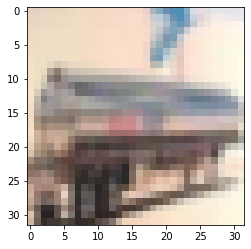

In [3]:
import matplotlib.pyplot as plt
import random

i = random.randrange(0,Xtrain.shape[0])
image = Xtrain[i]
image = np.array(image, dtype='float')
pixels = image.reshape((input_shape[0], input_shape[1], input_shape[2]))

label = Ytrain[i]
print(label)

plt.imshow(pixels)
plt.show()


##LeNet model


In [5]:
def LeNet(input_shape, num_classes):
    
    print('\nLeNet model')
    model = Sequential()
    
    print('\tC1: Convolutional 6 kernels 5x5')
    # With padding='same' we specify that the output of this Conv2D will be a 32 x 32 x 6 tensor
    # With padding='valid' we specify that the output of a Conv2D will depend on the size of the kernel
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding='same'))

    print('\tS2: Average Pooling 2x2 stride 2x2')
    # This AvgPooling, returns a tensor with size 16 x 16 x 6
    # Note the "valid" padding value as well.
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    print('\tC3: Convolutional 16 kernels 5x5')
    # Simple Conv2D layer with which returns a tensor with size 12 x 12 x 16
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

    print('\tS4: Average Pooling 2x2 stride 2x2')
    # This AvgPooling, returns a tensor with size 6 x 6 x 16
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    print('\tC5: Convolutional 120 kernels 5x5')
    # Simple Conv2D layer with which returns a tensor with size 2 x 2 x 120    
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

    model.add(Flatten()) # -> a 1x480 tensor

    print('\tF6: Fully connected, 84 units')
    # FC Layer with output 1x84
    model.add(Dense(84, activation='tanh'))

    print('\tF7: Fully connected, 10 units')
    # FC Layer with 1x10 where we apply a softmax function
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = 'adam' #alternative 'SGD'
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
 
# create the model
model = LeNet(input_shape,num_classes)
model.summary()


LeNet model
	C1: Convolutional 6 kernels 5x5
	S2: Average Pooling 2x2 stride 2x2
	C3: Convolutional 16 kernels 5x5
	S4: Average Pooling 2x2 stride 2x2
	C5: Convolutional 120 kernels 5x5
	F6: Fully connected, 84 units
	F7: Fully connected, 10 units
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_2 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
   

## Train

In [6]:
epochs = 30
history = model.fit(Xtrain, Ytrain, batch_size=32, epochs=epochs, validation_data = (Xtest,Ytest))



Epoch 1/30
1563/1563 [==============================] - 16s 5ms/step - loss: 1.7921 - accuracy: 0.3639 - val_loss: 1.6433 - val_accuracy: 0.4173
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5516 - accuracy: 0.4489 - val_loss: 1.5032 - val_accuracy: 0.4726
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4508 - accuracy: 0.4867 - val_loss: 1.4701 - val_accuracy: 0.4811
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3878 - accuracy: 0.5087 - val_loss: 1.4117 - val_accuracy: 0.5043
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3311 - accuracy: 0.5296 - val_loss: 1.4113 - val_accuracy: 0.5015
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2810 - accuracy: 0.5475 - val_loss: 1.3646 - val_accuracy: 0.5214
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2327 - accuracy: 0.5650 - val_loss: 1.3543 - val_accuracy

##Evaluate the model

## Print scores

Overall accuracy, precision, recall and F-score 

In [7]:
# accuracy
score = model.evaluate(Xtest, Ytest)
print("Test loss: %f" %score[0])
print("Test accuracy: %f" %score[1])

preds = model.predict(Xtest,verbose=1)
Ypred = np.argmax(preds, axis=1)

print('%s' %str(Ypred.shape))
print('%s' %str(Ytest.shape))

print(classification_report(Ytest, Ypred, digits=3))  

313/313 [==============================] - 1s 3ms/step - loss: 1.8222 - accuracy: 0.5134
Test loss: 1.822241
Test accuracy: 0.513400
313/313 [==============================] - 1s 2ms/step
(10000,)
(10000, 1)
              precision    recall  f1-score   support

           0      0.595     0.508     0.548      1000
           1      0.658     0.611     0.634      1000
           2      0.397     0.407     0.402      1000
           3      0.358     0.329     0.343      1000
           4      0.426     0.486     0.454      1000
           5      0.420     0.439     0.430      1000
           6      0.515     0.669     0.582      1000
           7      0.584     0.550     0.567      1000
           8      0.631     0.608     0.619      1000
           9      0.596     0.527     0.559      1000

    accuracy                          0.513     10000
   macro avg      0.518     0.513     0.514     10000
weighted avg      0.518     0.513     0.514     10000



##Plot results

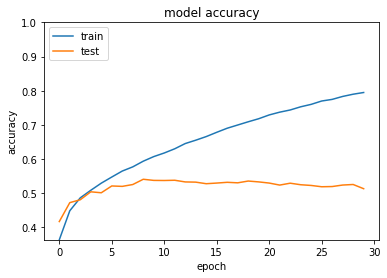

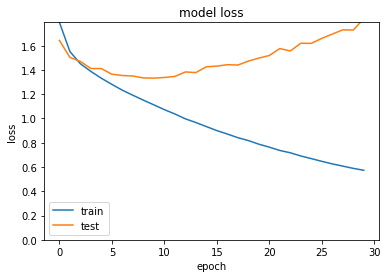

In [8]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(np.min(history.history['accuracy']), 1.0)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.0, np.max(history.history['loss']))
plt.legend(['train', 'test'], loc='lower left')
plt.show()

# Home Exercises

**Question 1** 

Compare the model defined above with a model with the same structure but with `ReLU` activation functions in all the layers.


In [10]:
def LeNet_ReLU(input_shape, num_classes):
    
    print('\nLeNet model with ReLU activation function')
    model = Sequential()
    
    print('\tC1: Convolutional 6 kernels 5x5')
    # With padding='same' we specify that the output of this Conv2D will be a 32 x 32 x 6 tensor
    # With padding='valid' we specify that the output of a Conv2D will depend on the size of the kernel
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding='same'))

    print('\tS2: Average Pooling 2x2 stride 2x2')
    # This AvgPooling, returns a tensor with size 16 x 16 x 6
    # Note the "valid" padding value as well.
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    print('\tC3: Convolutional 16 kernels 5x5')
    # Simple Conv2D layer with which returns a tensor with size 12 x 12 x 16
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

    print('\tS4: Average Pooling 2x2 stride 2x2')
    # This AvgPooling, returns a tensor with size 6 x 6 x 16
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    print('\tC5: Convolutional 120 kernels 5x5')
    # Simple Conv2D layer with which returns a tensor with size 2 x 2 x 120    
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

    model.add(Flatten()) # -> a 1x480 tensor

    print('\tF6: Fully connected, 84 units')
    # FC Layer with output 1x84
    model.add(Dense(84, activation='relu'))

    print('\tF7: Fully connected, 10 units')
    # FC Layer with 1x10 where we apply a softmax function
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = 'adam' #alternative 'SGD'
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
 
# create the model
model = LeNet_ReLU(input_shape,num_classes)
model.summary()


LeNet model with ReLU activation function
	C1: Convolutional 6 kernels 5x5
	S2: Average Pooling 2x2 stride 2x2
	C3: Convolutional 16 kernels 5x5
	S4: Average Pooling 2x2 stride 2x2
	C5: Convolutional 120 kernels 5x5
	F6: Fully connected, 84 units
	F7: Fully connected, 10 units
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_4 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                           

In [11]:
epochs = 30
history = model.fit(Xtrain, Ytrain, batch_size=32, epochs=epochs, validation_data = (Xtest,Ytest))



Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6570 - accuracy: 0.3956 - val_loss: 1.4281 - val_accuracy: 0.4811
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3256 - accuracy: 0.5273 - val_loss: 1.2483 - val_accuracy: 0.5546
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1977 - accuracy: 0.5755 - val_loss: 1.1812 - val_accuracy: 0.5809
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1024 - accuracy: 0.6091 - val_loss: 1.1308 - val_accuracy: 0.5978
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0336 - accuracy: 0.6334 - val_loss: 1.1004 - val_accuracy: 0.6110
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9827 - accuracy: 0.6530 - val_loss: 1.1010 - val_accuracy: 0.6132
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9391 - accuracy: 0.6671 - val_loss: 1.0443 - val_accuracy:

In [12]:
# accuracy
score = model.evaluate(Xtest, Ytest)
print("Test loss: %f" %score[0])
print("Test accuracy: %f" %score[1])

preds = model.predict(Xtest,verbose=1)
Ypred = np.argmax(preds, axis=1)

print('%s' %str(Ypred.shape))
print('%s' %str(Ytest.shape))

print(classification_report(Ytest, Ypred, digits=3))  

313/313 [==============================] - 1s 3ms/step - loss: 1.7308 - accuracy: 0.6208
Test loss: 1.730778
Test accuracy: 0.620800
313/313 [==============================] - 1s 2ms/step
(10000,)
(10000, 1)
              precision    recall  f1-score   support

           0      0.632     0.671     0.651      1000
           1      0.758     0.754     0.756      1000
           2      0.514     0.530     0.522      1000
           3      0.413     0.406     0.409      1000
           4      0.565     0.564     0.565      1000
           5      0.500     0.494     0.497      1000
           6      0.683     0.672     0.677      1000
           7      0.676     0.688     0.682      1000
           8      0.768     0.699     0.732      1000
           9      0.707     0.730     0.719      1000

    accuracy                          0.621     10000
   macro avg      0.622     0.621     0.621     10000
weighted avg      0.622     0.621     0.621     10000



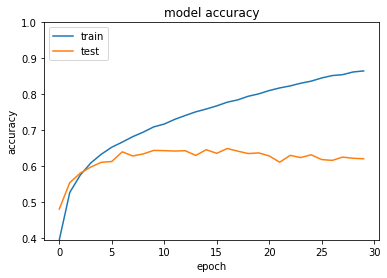

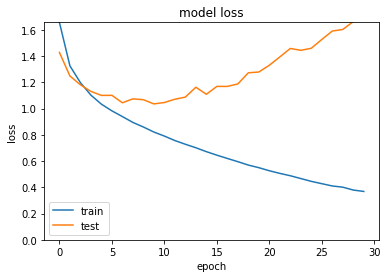

In [13]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(np.min(history.history['accuracy']), 1.0)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.0, np.max(history.history['loss']))
plt.legend(['train', 'test'], loc='lower left')
plt.show()